Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

     ---------------------------------------- 1.3/1.3 MB 754.4 kB/s eta 0:00:00
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.33.6
    Uninstalling wheel-0.33.6:
      Successfully uninstalled wheel-0.33.6
  Attempting uninstall: setuptools
    Found existing installation: setuptools 41.4.0
    Uninstalling setuptools-41.4.0:
      Successfully uninstalled setuptools-41.4.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.11.0 which is incompatible.


     ---------------------------------------- 8.6/8.6 MB 719.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numpy-1.16.6-cp37-cp37m-win_amd64.whl (11.9 MB)
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080051 sha256=7f781b50e18f28dc531348a9bafd837fff5b8af11d40358ae8975272e7dbfe54
  Stored in directory: c:\users\-toshiba-\appdata\local\pip\cache\wheels\d8\44\db\647eeda59a5480a60049f7a3668c69ce252f8c0c7fc93c2559
Successfully built bokeh
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.13
    Uninstalling urllib3-1.26.13:
      Successfully uninstalled urllib3-1.26.13
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
  At

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\-toshiba-\\anaconda3\\lib\\site-packages\\~~mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



     ---------------------------------------- 14.0/14.0 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 1.1 MB/s eta 0:00:00
     ------------------------------------ 140.6/140.6 kB 639.2 kB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.22
    Uninstalling urllib3-1.22:
      Successfully uninstalled urllib3-1.22
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.6
    Uninstalling numpy-1.16.6:
      Successfully uninstalled numpy-1.16.6
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\-TOSHI~1\\AppData\\Local\\Temp\\pip-uninstall-zgq816_1\\_speedups.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## AutoGluon Classifier

In [3]:
# Load in the wine dataset
wine = datasets.load_wine()

In [4]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target

In [5]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df,test_size=0.2,random_state=0)

In [6]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label="target").fit(
train_data=df_train,time_limit=120,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20230121_025405\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels\ag-20230121_025405\"
AutoGluon Version:  0.6.1
Python Version:     3.7.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   6.3.9600
Train Data Rows:    142
Train Data Columns: 13
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 1, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the d

In [7]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.992958       0.304036  37.749185                0.000993           0.308096            2       True          6
1  NeuralNetFastAI_BAG_L1   0.985915       0.189012  37.430056                0.189012          37.430056            1       True          3
2   KNeighborsDist_BAG_L1   0.711268       0.107033   0.013003                0.107033           0.013003            1       True          2
3   KNeighborsUnif_BAG_L1   0.661972       0.114032   0.011033                0.114032           0.011033            1       True          1
4       LightGBMXT_BAG_L1   0.500000       0.023011  17.543786                0.023011          17.543786            1       True          4
5         LightGBM_BAG_L1   0.500000       0.024020  17.177833                0.024020      

C:\Users\-TOSHIBA-\AppData\Roaming\Python\Python37\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7112676056338029,
  'NeuralNetFastAI_BAG_L1': 0.9859154929577465,
  'LightGBMXT_BAG_L1': 0.5,
  'LightGBM_BAG_L1': 0.5,
  'WeightedEnsemble_L2': 0.9929577464788732},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels\\ag-20230121_025405\\models\\KNeighborsUnif_BAG_L1\\',
  'KNeighborsDist_BAG_L1': 'AutogluonModels\\ag-20230121_025405\\models\\KNeighborsDist_BAG_L1\\',
  'NeuralNetFastAI_BAG_L1': 'AutogluonModels\\ag-20230121_025405\\models\\NeuralNetFastAI_BAG_L1\\',
  'LightGBMXT_BAG_L1': 'AutogluonModels\\

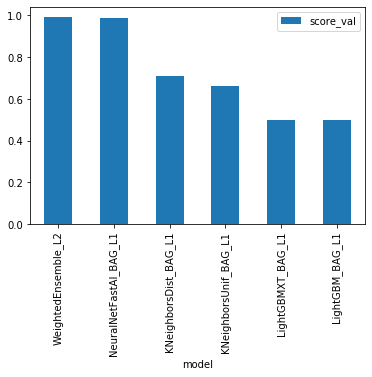

In [17]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

In [18]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

Evaluation: accuracy on test data: 1.0
Evaluations on test data:
{
    "accuracy": 1.0,
    "balanced_accuracy": 1.0,
    "mcc": 1.0
}


## AutoGluon Regression

In [14]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [23]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd['target'] = diabetes["target"]

In [24]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd,test_size=0.2,random_state=0)

In [26]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(label="target", problem_type="regression", eval_metric="r2").fit(
 train_data=dfd_train,
    time_limit=120,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20230121_031126\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels\ag-20230121_031126\"
AutoGluon Version:  0.6.1
Python Version:     3.7.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   6.3.9600
Train Data Rows:    353
Train Data Columns: 10
Label Column: target
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1357.66 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to b

2023-01-21 05:11:46,551	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-01-21 05:11:46,561	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy
		ray::_ray_fit() (pid=6184, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 662, in ray._raylet.execute_task
  File "python\ray\_raylet.pyx", line 666, in ray._raylet.execute_task
  File "C:\Users\-TOSHIBA-\AppData\Roaming\Python\Python37\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 375, in _ray_fit
    time_limit=time_limit_fold, **resources, **kwargs_fold)
  File "C:\Users\-TOSHIBA-\AppData\Roaming\Python\Python37\sit

In [27]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.527497       0.273242  65.334463                0.002000           0.819264            2       True          7
1         CatBoost_BAG_L1   0.522807       0.056020  30.106369                0.056020          30.106369            1       True          4
2    ExtraTreesMSE_BAG_L1   0.496684       0.226070   0.943258                0.226070           0.943258            1       True          5
3  NeuralNetFastAI_BAG_L1   0.490437       0.215222  34.408830                0.215222          34.408830            1       True          6
4  RandomForestMSE_BAG_L1   0.470609       0.243078   2.720872                0.243078           2.720872            1       True          3
5   KNeighborsDist_BAG_L1   0.439701       0.107071   0.011009                0.107071      

C:\Users\-TOSHIBA-\AppData\Roaming\Python\Python37\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.43052099899418794,
  'KNeighborsDist_BAG_L1': 0.43970122394744415,
  'RandomForestMSE_BAG_L1': 0.4706085411454686,
  'CatBoost_BAG_L1': 0.5228072001429453,
  'ExtraTreesMSE_BAG_L1': 0.4966838407427535,
  'NeuralNetFastAI_BAG_L1': 0.4904365973552325,
  'WeightedEnsemble_L2': 0.5274965177404389},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels\\ag-20230121_031126\\models\\KNeighborsUnif_BAG_L1\\',
  'KNeighborsDist_BAG_L1': 'AutogluonModels\\ag-20230121_031126\\models\\KNeighborsDist_BAG_L1\\

In [28]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)

Evaluation: r2 on test data: 0.32622122669364617
Evaluations on test data:
{
    "r2": 0.32622122669364617,
    "root_mean_squared_error": -58.77999985951051,
    "mean_squared_error": -3455.088383484056,
    "mean_absolute_error": -44.6154666857773,
    "pearsonr": 0.5822152560769933,
    "median_absolute_error": -36.28544616699219
}


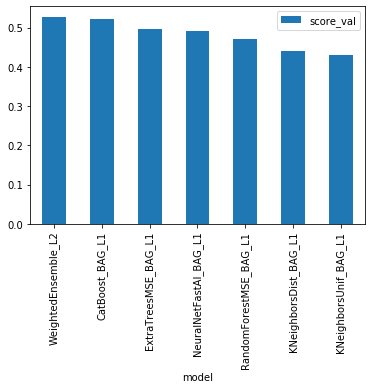

In [29]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");